## Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import tqdm
from tqdm import tqdm
import time
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import collections

pd.set_option('future.no_silent_downcasting', True)

## Data Preprocessing

### Required Functions

In [2]:
def preprocess(df):
    df['CITY 1'] = df['CITY 1'].str.upper();
    df['CITY 2'] = df['CITY 2'].str.upper();
    df['CITY 1'] = df['CITY 1'].str.strip();
    df['CITY 1'] = df['CITY 1'].str.rstrip();
    df['CITY 2'] = df['CITY 2'].str.strip();
    df['CITY 2'] = df['CITY 2'].str.rstrip();
    df.replace('-', 0, inplace=True);
    df.replace('DEOGHAR AIRPORT', 'DEOGHAR', inplace=True);
    df.replace('HOLLONGI AIRPORT, ITANAGAR', 'ITANAGAR', inplace=True);
    df.replace('KUSHINAGAR', 'KUSHINAGAR INTERNATIONAL AIRPORT', inplace=True);
    df.replace('BIDAR AIRPORT, KARN', 'BIDAR AIRPORT, KARNATAKA', inplace=True);
    df.replace('KALABURAGI, KARNAT', 'KALABURAGI, KARNATAKA', inplace=True);
    df.replace('Itanagar', 'ITANAGAR', inplace=True);
    df.replace('PUDUCHERRY', 'PONDICHERRY', inplace=True);
    df['PASSENGERS FROM CITY 2'] = df['PASSENGERS FROM CITY 2'].astype(int);
    df['PASSENGERS TO CITY 2'] = df['PASSENGERS TO CITY 2'].astype(int);
    
    return None

In [3]:
def graphi_format(df) -> pd.DataFrame:
    df1 = df.copy()
    df2 = df1.copy()
    
    df1.drop(columns=['PASSENGERS FROM CITY 2'], inplace=True)
    df2['CITY 1'], df2['CITY 2'] = df2['CITY 2'], df2['CITY 1']
    
    df2.drop(columns=['PASSENGERS TO CITY 2'], inplace=True)
    df2.rename(columns={'PASSENGERS FROM CITY 2': 'PASSENGERS TO CITY 2'}, inplace=True)
    
    return  pd.concat([df1, df2], ignore_index=True)

### 2023

In [4]:
jan2023_data = pd.read_excel('IndianAirways2023/JAN2023.xlsx')
feb2023_data = pd.read_excel('IndianAirways2023/FEB2023.xlsx')
mar2023_data = pd.read_excel('IndianAirways2023/MAR2023.xlsx')
apr2023_data = pd.read_excel('IndianAirways2023/APR2023.xlsx')
may2023_data = pd.read_excel('IndianAirways2023/MAY2023.xlsx')
jun2023_data = pd.read_excel('IndianAirways2023/JUN2023.xlsx')
jul2023_data = pd.read_excel('IndianAirways2023/JUL2023.xlsx')
aug2023_data = pd.read_excel('IndianAirways2023/AUG2023.xlsx')
sep2023_data = pd.read_excel('IndianAirways2023/SEP2023.xlsx')
oct2023_data = pd.read_excel('IndianAirways2023/OCT2023.xlsx')
nov2023_data = pd.read_excel('IndianAirways2023/NOV2023.xlsx')
dec2023_data = pd.read_excel('IndianAirways2023/DEC2023.xlsx')

data2023_list = [jan2023_data, feb2023_data, mar2023_data, apr2023_data, may2023_data, jun2023_data, jul2023_data, aug2023_data, sep2023_data, oct2023_data, nov2023_data, dec2023_data]
for data in data2023_list:
    preprocess(data)

combined2023_data = pd.concat([data for data in data2023_list])
combined2023_data = combined2023_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2023_list.append(combined2023_data)

data2023_list_graphi_format = [graphi_format(data) for data in data2023_list]

### 2022

In [5]:
jan2022_data = pd.read_excel('IndianAirways2022/JAN2022.xlsx')
feb2022_data = pd.read_excel('IndianAirways2022/FEB2022.xlsx')
mar2022_data = pd.read_excel('IndianAirways2022/MAR2022.xlsx')
apr2022_data = pd.read_excel('IndianAirways2022/APR2022.xlsx')
may2022_data = pd.read_excel('IndianAirways2022/MAY2022.xlsx')
jun2022_data = pd.read_excel('IndianAirways2022/JUN2022.xlsx')
jul2022_data = pd.read_excel('IndianAirways2022/JUL2022.xlsx')
aug2022_data = pd.read_excel('IndianAirways2022/AUG2022.xlsx')
sep2022_data = pd.read_excel('IndianAirways2022/SEP2022.xlsx')
oct2022_data = pd.read_excel('IndianAirways2022/OCT2022.xlsx')
nov2022_data = pd.read_excel('IndianAirways2022/NOV2022.xlsx')
dec2022_data = pd.read_excel('IndianAirways2022/DEC2022.xlsx')

data2022_list = [jan2022_data, feb2022_data, mar2022_data, apr2022_data, may2022_data, jun2022_data, jul2022_data, aug2022_data, sep2022_data, oct2022_data, nov2022_data, dec2022_data]
for data in data2022_list:
    preprocess(data)
    
combined2022_data = pd.concat([data for data in data2022_list])
combined2022_data = combined2022_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2022_list.append(combined2022_data)

data2022_list_graphi_format = [graphi_format(data) for data in data2022_list]

### 2021

In [6]:
jan2021_data = pd.read_excel('IndianAirways2021/JAN2021.xlsx')
feb2021_data = pd.read_excel('IndianAirways2021/FEB2021.xlsx')
mar2021_data = pd.read_excel('IndianAirways2021/MAR2021.xlsx')
apr2021_data = pd.read_excel('IndianAirways2021/APR2021.xlsx')
may2021_data = pd.read_excel('IndianAirways2021/MAY2021.xlsx')
jun2021_data = pd.read_excel('IndianAirways2021/JUN2021.xlsx')
jul2021_data = pd.read_excel('IndianAirways2021/JUL2021.xlsx')
aug2021_data = pd.read_excel('IndianAirways2021/AUG2021.xlsx')
sep2021_data = pd.read_excel('IndianAirways2021/SEP2021.xlsx')
oct2021_data = pd.read_excel('IndianAirways2021/OCT2021.xlsx')
nov2021_data = pd.read_excel('IndianAirways2021/NOV2021.xlsx')
dec2021_data = pd.read_excel('IndianAirways2021/DEC2021.xlsx')

data2021_list = [jan2021_data, feb2021_data, mar2021_data, apr2021_data, may2021_data, jun2021_data, jul2021_data, aug2021_data, sep2021_data, oct2021_data, nov2021_data, dec2021_data]
for data in data2021_list:
    preprocess(data)
    
combined2021_data = pd.concat([data for data in data2021_list])
combined2021_data = combined2021_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2021_list.append(combined2021_data)

data2021_list_graphi_format = [graphi_format(data) for data in data2021_list]

### 2020

In [7]:
jan2020_data = pd.read_excel('IndianAirways2020/JAN2020.xlsx')
feb2020_data = pd.read_excel('IndianAirways2020/FEB2020.xlsx')
mar2020_data = pd.read_excel('IndianAirways2020/MAR2020.xlsx')
apr2020_data = pd.read_excel('IndianAirways2020/APR2020.xlsx')
may2020_data = pd.read_excel('IndianAirways2020/MAY2020.xlsx')
jun2020_data = pd.read_excel('IndianAirways2020/JUN2020.xlsx')
jul2020_data = pd.read_excel('IndianAirways2020/JUL2020.xlsx')
aug2020_data = pd.read_excel('IndianAirways2020/AUG2020.xlsx')
sep2020_data = pd.read_excel('IndianAirways2020/SEP2020.xlsx')
oct2020_data = pd.read_excel('IndianAirways2020/OCT2020.xlsx')
nov2020_data = pd.read_excel('IndianAirways2020/NOV2020.xlsx')
dec2020_data = pd.read_excel('IndianAirways2020/DEC2020.xlsx')

data2020_list = [jan2020_data, feb2020_data, mar2020_data, apr2020_data, may2020_data, jun2020_data, jul2020_data, aug2020_data, sep2020_data, oct2020_data, nov2020_data, dec2020_data]
for data in data2020_list:
    preprocess(data)
    
combined2020_data = pd.concat([data for data in data2020_list])
combined2020_data = combined2020_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2020_list.append(combined2020_data)

data2020_list_graphi_format = [graphi_format(data) for data in data2020_list]

### 2019

In [8]:
jan2019_data = pd.read_excel('IndianAirways2019/JAN2019.xlsx')
feb2019_data = pd.read_excel('IndianAirways2019/FEB2019.xlsx')
mar2019_data = pd.read_excel('IndianAirways2019/MAR2019.xlsx')
apr2019_data = pd.read_excel('IndianAirways2019/APR2019.xlsx')
may2019_data = pd.read_excel('IndianAirways2019/MAY2019.xlsx')
jun2019_data = pd.read_excel('IndianAirways2019/JUN2019.xlsx')
jul2019_data = pd.read_excel('IndianAirways2019/JUL2019.xlsx')
aug2019_data = pd.read_excel('IndianAirways2019/AUG2019.xlsx')
sep2019_data = pd.read_excel('IndianAirways2019/SEP2019.xlsx')
oct2019_data = pd.read_excel('IndianAirways2019/OCT2019.xlsx')
nov2019_data = pd.read_excel('IndianAirways2019/NOV2019.xlsx')
dec2019_data = pd.read_excel('IndianAirways2019/DEC2019.xlsx')

data2019_list = [jan2019_data, feb2019_data, mar2019_data, apr2019_data, may2019_data, jun2019_data, jul2019_data, aug2019_data, sep2019_data, oct2019_data, nov2019_data, dec2019_data]
for data in data2019_list:
    preprocess(data)
    
combined2019_data = pd.concat([data for data in data2019_list])
combined2019_data = combined2019_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2019_list.append(combined2019_data)

data2019_list_graphi_format = [graphi_format(data) for data in data2019_list]

### 2018

In [9]:
jan2018_data = pd.read_excel('IndianAirways2018/JAN2018.xlsx')
feb2018_data = pd.read_excel('IndianAirways2018/FEB2018.xlsx')
mar2018_data = pd.read_excel('IndianAirways2018/MAR2018.xlsx')
apr2018_data = pd.read_excel('IndianAirways2018/APR2018.xlsx')
may2018_data = pd.read_excel('IndianAirways2018/MAY2018.xlsx')
jun2018_data = pd.read_excel('IndianAirways2018/JUN2018.xlsx')
jul2018_data = pd.read_excel('IndianAirways2018/JUL2018.xlsx')
aug2018_data = pd.read_excel('IndianAirways2018/AUG2018.xlsx')
sep2018_data = pd.read_excel('IndianAirways2018/SEP2018.xlsx')
oct2018_data = pd.read_excel('IndianAirways2018/OCT2018.xlsx')
nov2018_data = pd.read_excel('IndianAirways2018/NOV2018.xlsx')
dec2018_data = pd.read_excel('IndianAirways2018/DEC2018.xlsx')

data2018_list = [jan2018_data, feb2018_data, mar2018_data, apr2018_data, may2018_data, jun2018_data, jul2018_data, aug2018_data, sep2018_data, oct2018_data, nov2018_data, dec2018_data]
for data in data2018_list:
    preprocess(data)
    
combined2018_data = pd.concat([data for data in data2018_list])
combined2018_data = combined2018_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2018_list.append(combined2018_data)

data2018_list_graphi_format = [graphi_format(data) for data in data2018_list]

### 2017

In [10]:
jan2017_data = pd.read_excel('IndianAirways2017/JAN2017.xlsx')
feb2017_data = pd.read_excel('IndianAirways2017/FEB2017.xlsx')
mar2017_data = pd.read_excel('IndianAirways2017/MAR2017.xlsx')
apr2017_data = pd.read_excel('IndianAirways2017/APR2017.xlsx')
may2017_data = pd.read_excel('IndianAirways2017/MAY2017.xlsx')
jun2017_data = pd.read_excel('IndianAirways2017/JUN2017.xlsx')
jul2017_data = pd.read_excel('IndianAirways2017/JUL2017.xlsx')
aug2017_data = pd.read_excel('IndianAirways2017/AUG2017.xlsx')
sep2017_data = pd.read_excel('IndianAirways2017/SEP2017.xlsx')
oct2017_data = pd.read_excel('IndianAirways2017/OCT2017.xlsx')
nov2017_data = pd.read_excel('IndianAirways2017/NOV2017.xlsx')
dec2017_data = pd.read_excel('IndianAirways2017/DEC2017.xlsx')

data2017_list = [jan2017_data, feb2017_data, mar2017_data, apr2017_data, may2017_data, jun2017_data, jul2017_data, aug2017_data, sep2017_data, oct2017_data, nov2017_data, dec2017_data]
for data in data2017_list:
    preprocess(data)
    
combined2017_data = pd.concat([data for data in data2017_list])
combined2017_data = combined2017_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2017_list.append(combined2017_data)

data2017_list_graphi_format = [graphi_format(data) for data in data2017_list]

### 2016

In [11]:
jan2016_data = pd.read_excel('IndianAirways2016/JAN2016.xlsx')
feb2016_data = pd.read_excel('IndianAirways2016/FEB2016.xlsx')
mar2016_data = pd.read_excel('IndianAirways2016/MAR2016.xlsx')
apr2016_data = pd.read_excel('IndianAirways2016/APR2016.xlsx')
may2016_data = pd.read_excel('IndianAirways2016/MAY2016.xlsx')
jun2016_data = pd.read_excel('IndianAirways2016/JUN2016.xlsx')
jul2016_data = pd.read_excel('IndianAirways2016/JUL2016.xlsx')
aug2016_data = pd.read_excel('IndianAirways2016/AUG2016.xlsx')
sep2016_data = pd.read_excel('IndianAirways2016/SEP2016.xlsx')
oct2016_data = pd.read_excel('IndianAirways2016/OCT2016.xlsx')
nov2016_data = pd.read_excel('IndianAirways2016/NOV2016.xlsx')
dec2016_data = pd.read_excel('IndianAirways2016/DEC2016.xlsx')

data2016_list = [jan2016_data, feb2016_data, mar2016_data, apr2016_data, may2016_data, jun2016_data, jul2016_data, aug2016_data, sep2016_data, oct2016_data, nov2016_data, dec2016_data]
for data in data2016_list:
    preprocess(data)
    
combined2016_data = pd.concat([data for data in data2016_list])
combined2016_data = combined2016_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2016_list.append(combined2016_data)

data2016_list_graphi_format = [graphi_format(data) for data in data2016_list]

### 2015

In [12]:
apr2015_data = pd.read_excel('IndianAirways2015/APR2015.xlsx')
may2015_data = pd.read_excel('IndianAirways2015/MAY2015.xlsx')
jun2015_data = pd.read_excel('IndianAirways2015/JUN2015.xlsx')
jul2015_data = pd.read_excel('IndianAirways2015/JUL2015.xlsx')
aug2015_data = pd.read_excel('IndianAirways2015/AUG2015.xlsx')
sep2015_data = pd.read_excel('IndianAirways2015/SEP2015.xlsx')
oct2015_data = pd.read_excel('IndianAirways2015/OCT2015.xlsx')
nov2015_data = pd.read_excel('IndianAirways2015/NOV2015.xlsx')
dec2015_data = pd.read_excel('IndianAirways2015/DEC2015.xlsx')

data2015_list = [apr2015_data, may2015_data, jun2015_data, jul2015_data, aug2015_data, sep2015_data, oct2015_data, nov2015_data, dec2015_data]
for data in data2015_list:
    preprocess(data)
    
combined2015_data = pd.concat([data for data in data2015_list])
combined2015_data = combined2015_data.groupby(['CITY 1', 'CITY 2']).sum().reset_index()
data2015_list.append(combined2015_data)

data2015_list_graphi_format = [graphi_format(data) for data in data2015_list]

### Assigning IDs, Latitude, and Longitude to the cities, and GeoPandas Geometry

In [13]:
data_for_ID = pd.concat([data2023_list_graphi_format[-1], data2022_list_graphi_format[-1], data2021_list_graphi_format[-1], data2020_list_graphi_format[-1], data2019_list_graphi_format[-1], data2018_list_graphi_format[-1], data2017_list_graphi_format[-1], data2016_list_graphi_format[-1], data2015_list_graphi_format[-1]])
data_for_ID = data_for_ID.groupby(['CITY 1', 'CITY 2']).sum().reset_index()

unique_places = data_for_ID['CITY 1'].unique()
place_to_ID_dict = {place: ID for ID, place in enumerate(unique_places)}
ID_to_place_dict = {ID: place for place, ID in place_to_ID_dict.items()}

# place_to_ID_dict, ID_to_place_dict

In [14]:
# region
places_coordinates = {'AGARTALA': (23.8315, 91.2868), 'AGATTI ISLAND': (10.8231, 72.1768), 'AGRA': (27.1767, 78.0081), 'AHMEDABAD': (23.0225, 72.5714), 'AIZAWL': (23.7271, 92.7176), 'KISHANGARH': (26.5758, 74.8402), 'ALLAHABAD': (25.4358, 81.8463), 'AMRITSAR': (31.7055, 74.8023), 'AURANGABAD': (19.8762, 75.3433), 'BAGDOGRA': (26.6831, 88.3285), 'BAREILLY': (28.367, 79.4304), 'BELGAUM': (15.862, 74.5085), 'BENGALURU': (12.9716, 77.5946), 'BHAVNAGAR': (21.7645, 72.1519), 'BHOPAL': (23.2599, 77.4126), 'BHUBANESWAR': (20.2961, 85.8245), 'BHUJ': (23.2531, 69.6693), 'BIKANER': (28.0229, 73.3119), 'BILASPUR': (22.0807, 82.15), 'MUMBAI': (19.076, 72.8777), 'CHANDIGARH': (30.7333, 76.7794), 'CHENNAI': (13.0827, 80.2707), 'KOCHI': (9.9312, 76.2673), 'COIMBATORE': (11.0168, 76.9558), 'DABOLIM': (15.3801, 73.8341), 'DARBHANGA': (26.1522, 85.896), 'DEHRADUN': (30.3165, 78.0322), 'DELHI': (28.6139, 77.209), 'DEOGHAR': (24.482, 86.6956), 'DHARAMSALA': (32.219, 76.3234), 'DIBRUGARH': (27.4728, 94.9119), 'DIMAPUR': (25.7951, 93.9501), 'DURGAPUR': (23.5505, 87.2885), 'GAYA': (24.7964, 85.0077), 'GHAZIABAD': (28.6692, 77.4538), 'GORAKHPUR': (26.7606, 83.3732), 'GUWAHATI': (26.1445, 91.7362), 'GWALIOR': (26.2183, 78.1828), 'HUBLI': (15.3647, 75.1239), 'HYDERABAD': (17.385, 78.4867), 'IMPHAL': (24.817, 93.9368), 'INDORE': (22.7196, 75.8577), 'JABALPUR': (23.1815, 79.9864), 'JAGDALPUR': (19.0822, 82.0212), 'JAIPUR': (26.9124, 75.7873), 'JAMMU': (32.7266, 74.857), 'JAMSHEDPUR': (22.8056, 86.1711), 'JEYPORE': (18.8564, 82.5644), 'JHARSUGUDA': (21.868, 84.0222), 'JODHPUR': (26.2389, 73.0243), 'JORHAT': (26.7465, 94.202), 'CUDDAPAH': (14.4786, 78.8236), 'KALABURAGI': (17.3297, 76.8372), 'KANNUR': (11.8745, 75.3704), 'KOLHAPUR': (16.705, 74.2433), 'KOLKATA': (22.5726, 88.3639), 'KULLU': (31.9566, 77.1095), 'KURNOOL': (15.8281, 78.0373), 'LEH': (34.1526, 77.5771), 'LILABARI': (27.2955, 94.0977), 'LUCKNOW': (26.8467, 80.9462), 'MADURAI': (9.9252, 78.1198), 'MANGALORE': (12.9141, 74.856), 'NAGPUR': (21.1458, 79.0882), 'PASIGHAT': (28.0665, 95.3269), 'PATNA': (25.5941, 85.1376), 'PORT BLAIR': (11.6234, 92.7265), 'PUNE': (18.5204, 73.8567), 'RAIPUR': (21.2514, 81.6296), 'RAJAHMUNDRY': (17.6868, 83.2185), 'RANCHI': (23.3441, 85.3096), 'SHILLONG': (25.5788, 91.8933), 'SHIRDI': (19.7515, 74.4773), 'SRINAGAR': (34.0837, 74.7973), 'TIRUPATI': (13.6288, 79.4192), 'VARANASI': (25.3176, 82.9739), 'VIJAYAWADA': (16.5062, 80.648), 'GOA': (15.2993, 74.124), 'AJMER': (26.4499, 74.6399), 'COOCH BEHAR': (26.3254, 89.4414), 'DEHRA DUN': (30.3165, 78.0322), 'ITANAGAR': (27.0978, 93.6237), 'KADAPA': (14.4674, 78.8242), 'MOPA, GOA': (15.3888, 73.8335), 'Mopa, Goa': (15.3888, 73.8335), 'DIU': (20.7141, 70.9822), 'SURAT': (21.1702, 72.8311), 'KANPUR': (26.4499, 80.3319), 'RAJKOT': (22.3039, 70.8022), 'SHIVAMOGGA AIRPORT': (13.3986, 74.7421), 'BHATINDA': (30.1709, 74.9153), 'RAJKOT INTERNATIONAL AIRPORT': (22.3039, 70.8022), 'ADAMPUR': (31.4332, 75.758), 'KHAJURAHO': (24.817, 79.9342), 'UTKELA': (20.1463, 83.1822), 'JAISALMER': (26.9155, 70.9083), 'JAMNAGAR': (22.4707, 70.0577), 'KANDLA': (23.0046, 70.2167), 'KESHOD': (21.3177, 70.271), 'KOZHIKODE': (11.2588, 75.7804), 'MALVAN': (16.0662, 73.4665), 'GONDIA': (21.4602, 80.192), 'KADAPA': (14.4674, 78.8242), 'VISAKHAPATNAM': (17.6868, 83.2185), 'TRIVANDRUM': (8.5241, 76.9366), 'UDAIPUR': (24.5854, 73.7125), 'VADODARA': (22.3072, 73.1812), 'BIDAR': (17.9133, 77.5301), 'SILCHAR': (24.8278, 92.797), 'TIRUCHIRAPALLY': (10.7905, 78.7047), 'TUTICORIN': (8.7642, 78.1348), 'VIDYANAGAR': (15.389, 75.091), 'NASIK': (19.9975, 73.7898), 'PONDICHERRY': (11.9416, 79.8083), 'SILCHAR': (24.8278, 92.797), 'ROURKELA': (22.2604, 84.8536), 'MYSORE': (12.2958, 76.6394), 'PANTNAGAR': (29.0328, 79.4737), 'SIMLA': (31.1048, 77.1734), 'TEZU': (27.9161, 96.161), 'RUPSI': (26.1511, 89.9652), 'TEZPUR': (26.7095, 92.7917), 'ZIRO': (27.5564, 93.8287), 'SINDHUDURG AIRPORT': (16.2391, 73.649), 'KUSHINAGAR INTERNATIONAL AIRPORT': (26.7401, 83.3706), 'PAKYONG': (27.3325, 88.6159), 'UTTARLAI': (25.8036, 71.4104), 'ZERO AIRPORT': (27.5915, 93.8287), 'LUDHIANA': (30.901, 75.8573), 'SALEM': (11.6643, 78.146), 'AYODHYA INTERNATIONAL AIRPORT': (26.7271, 82.1829), 'JALGAON': (20.9622, 75.6267), 'KALABURAGI, KARNATAKA': (17.3078, 76.9581), 'PORBANDAR': ( 21.6405, 69.6059), 'NANDED': (19.1833, 77.3167), 'PATHANKOT': (32.2336, 75.6344), 'BIDAR AIRPORT, KARNATAKA': (17.9064, 77.4832), 'GONDIA AIRPORT': (21.5261, 80.2903), 'HISSAR': (29.1794, 75.7553), 'MUNDRA': (22.8348, 69.7654), 'PITHORAGARH': (29.5936, 80.2392), 'GANGTOK': (27.3389, 88.6065), 'COCHIN': (9.9312, 76.2673)}
# endregion

In [15]:
for year_data in [data2023_list, data2022_list, data2021_list, data2020_list, data2019_list, data2018_list, data2017_list, data2016_list, data2015_list,data2023_list_graphi_format, data2022_list_graphi_format, data2021_list_graphi_format, data2020_list_graphi_format, data2019_list_graphi_format, data2018_list_graphi_format, data2017_list_graphi_format, data2016_list_graphi_format, data2015_list_graphi_format]:
    for month_data in year_data:
        month_data['CITY 1 ID'] = month_data['CITY 1'].apply(lambda x: place_to_ID_dict[x])
        month_data['CITY 2 ID'] = month_data['CITY 2'].apply(lambda x: place_to_ID_dict[x])
        month_data['LATITUDE 1'] = month_data['CITY 1'].apply(lambda x: places_coordinates[x][0])
        month_data['LONGITUDE 1'] = month_data['CITY 1'].apply(lambda x: places_coordinates[x][1])
        month_data['LATITUDE 2'] = month_data['CITY 2'].apply(lambda x: places_coordinates[x][0])
        month_data['LONGITUDE 2'] = month_data['CITY 2'].apply(lambda x: places_coordinates[x][1])
        geometry1 = [Point(xy) for xy in zip(month_data['LONGITUDE 1'], month_data['LATITUDE 1'])]
        geometry2 = [Point(xy) for xy in zip(month_data['LONGITUDE 2'], month_data['LATITUDE 2'])]
        month_data['GEOMETRY CITY 1'] = geometry1
        month_data['GEOMETRY CITY 2'] = geometry2
        

In [16]:
# combined2023_data[combined2023_data['CITY 1'] == "BHUBANESWAR"]
# data2022_list_graphi_format[-1][data2022_list_graphi_format[-1]['CITY 2'] == "BHUBANESWAR"]

In [17]:
len(places_coordinates)

141

### Making the Networks

In [18]:
apr2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2015_network = nx.from_pandas_edgelist(data2015_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2016_network = nx.from_pandas_edgelist(data2016_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2017_network = nx.from_pandas_edgelist(data2017_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2018_network = nx.from_pandas_edgelist(data2018_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2019_network = nx.from_pandas_edgelist(data2019_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2020_network = nx.from_pandas_edgelist(data2020_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2021_network = nx.from_pandas_edgelist(data2021_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2022_network = nx.from_pandas_edgelist(data2022_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

jan2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[0], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
feb2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
mar2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[2], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
apr2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[3], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
may2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[4], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jun2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[5], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
jul2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[6], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
aug2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[7], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
sep2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[8], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
oct2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[9], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
nov2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[10], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
dec2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[11], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])
year2023_network = nx.from_pandas_edgelist(data2023_list_graphi_format[-1], 'CITY 1', 'CITY 2', ['PASSENGERS TO CITY 2', 'GEOMETRY CITY 1', 'GEOMETRY CITY 2'])

## Actual Work

In [23]:
india = gpd.read_file(r'Maps_with_python-master/india-polygon.shp')

# Find maximum number of passengers in a in any given month and year separately
max_passengers_2015_monthwise = [max(data2015_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(8)]
max_passengers_2016_monthwise = [max(data2016_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2017_monthwise = [max(data2017_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2018_monthwise = [max(data2018_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2019_monthwise = [max(data2019_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2020_monthwise = [max(data2020_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2021_monthwise = [max(data2021_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2022_monthwise = [max(data2022_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]
max_passengers_2023_monthwise = [max(data2023_list_graphi_format[i]['PASSENGERS TO CITY 2']) for i in range(12)]

max_passengers_2015 = max(data2015_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2016 = max(data2016_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2017 = max(data2017_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2018 = max(data2018_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2019 = max(data2019_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2020 = max(data2020_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2021 = max(data2021_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2022 = max(data2022_list_graphi_format[-1]['PASSENGERS TO CITY 2'])
max_passengers_2023 = max(data2023_list_graphi_format[-1]['PASSENGERS TO CITY 2'])

max_passengers = max(max_passengers_2015, max_passengers_2016, max_passengers_2017, max_passengers_2018, max_passengers_2019, max_passengers_2020, max_passengers_2021, max_passengers_2022, max_passengers_2023)

print("Maximum number of passengers in 2015 monthwise are: ", max_passengers_2015_monthwise)
print("Maximum number of passengers in 2016 monthwise are: ", max_passengers_2016_monthwise)
print("Maximum number of passengers in 2017 monthwise are: ", max_passengers_2017_monthwise)
print("Maximum number of passengers in 2018 monthwise are: ", max_passengers_2018_monthwise)
print("Maximum number of passengers in 2019 monthwise are: ", max_passengers_2019_monthwise)
print("Maximum number of passengers in 2020 monthwise are: ", max_passengers_2020_monthwise)
print("Maximum number of passengers in 2021 monthwise are: ", max_passengers_2021_monthwise)
print("Maximum number of passengers in 2022 monthwise are: ", max_passengers_2022_monthwise)
print("Maximum number of passengers in 2023 monthwise are: ", max_passengers_2023_monthwise)
print()
print("MAXIMUM NUMBER OF PASSENGERS IN 2015 IS: ", max_passengers_2015)
print("MAXIMUM NUMBER OF PASSENGERS IN 2016 IS: ", max_passengers_2016)
print("MAXIMUM NUMBER OF PASSENGERS IN 2017 IS: ", max_passengers_2017)
print("MAXIMUM NUMBER OF PASSENGERS IN 2018 IS: ", max_passengers_2018)
print("MAXIMUM NUMBER OF PASSENGERS IN 2019 IS: ", max_passengers_2019)
print("MAXIMUM NUMBER OF PASSENGERS IN 2020 IS: ", max_passengers_2020)
print("MAXIMUM NUMBER OF PASSENGERS IN 2021 IS: ", max_passengers_2021)
print("MAXIMUM NUMBER OF PASSENGERS IN 2022 IS: ", max_passengers_2022)
print("MAXIMUM NUMBER OF PASSENGERS IN 2023 IS: ", max_passengers_2023)
print()
print("MAXIMUM NUMBER OF PASSENGERS IN ANY GIVEN MONTH AND YEAR IS: ", max_passengers)

Maximum number of passengers in 2015 monthwise are:  [255579, 270727, 248419, 235638, 236913, 237101, 202977, 271141]
Maximum number of passengers in 2016 monthwise are:  [276940, 270826, 281229, 281929, 298834, 270782, 274486, 275326, 272434, 288071, 305551, 324571]
Maximum number of passengers in 2017 monthwise are:  [308473, 279899, 292065, 295682, 325674, 291750, 276127, 282696, 271363, 302225, 301837, 325800]
Maximum number of passengers in 2018 monthwise are:  [320155, 305382, 332520, 323263, 328088, 297612, 300401, 308538, 295823, 293009, 279056, 311187]
Maximum number of passengers in 2019 monthwise are:  [299458, 274592, 287058, 273951, 295629, 298329, 285976, 299669, 298080, 311493, 330592, 329523]
Maximum number of passengers in 2020 monthwise are:  [310952, 316755, 162116, 0, 7783, 54134, 47769, 60556, 71899, 80605, 90314, 92348]
Maximum number of passengers in 2021 monthwise are:  [102366, 124450, 115900, 90379, 39911, 67386, 89662, 124739, 130155, 188404, 226760, 230602]


In [ ]:
# for u, v, dataAD in G.edges(data=True):
#     try:
#         start = node_geometries[u]
#         end = node_geometries[v]
#         weight = dataAD['weight']
#         thickness = min_thickness + ((weight - min_weight)/(max_weight-min_weight))*max_thickness
#         ax.arrow(start.x,  start.y, end.x-start.x, end.y-start.y, alpha=0.8, linewidth= thickness, length_includes_head=True, head_width=100000, head_length=200000, fc='black', ec='darkgray')


In [45]:
may2015_network.edges(data=True)

EdgeDataView([('AGATTI ISLAND', 'KOCHI', {'PASSENGERS TO CITY 2': 787}), ('KOCHI', 'AHMEDABAD', {'PASSENGERS TO CITY 2': 2027}), ('KOCHI', 'BENGALURU', {'PASSENGERS TO CITY 2': 27351}), ('KOCHI', 'CHENNAI', {'PASSENGERS TO CITY 2': 20061}), ('KOCHI', 'DELHI', {'PASSENGERS TO CITY 2': 22701}), ('KOCHI', 'HYDERABAD', {'PASSENGERS TO CITY 2': 13143}), ('KOCHI', 'PUNE', {'PASSENGERS TO CITY 2': 5486}), ('KOCHI', 'TRIVANDRUM', {'PASSENGERS TO CITY 2': 2712}), ('KOCHI', 'KOLKATA', {'PASSENGERS TO CITY 2': 1634}), ('KOCHI', 'KOZHIKODE', {'PASSENGERS TO CITY 2': 303}), ('KOCHI', 'MUMBAI', {'PASSENGERS TO CITY 2': 44199}), ('AHMEDABAD', 'BENGALURU', {'PASSENGERS TO CITY 2': 13112}), ('AHMEDABAD', 'BHOPAL', {'PASSENGERS TO CITY 2': 720}), ('AHMEDABAD', 'CHENNAI', {'PASSENGERS TO CITY 2': 14762}), ('AHMEDABAD', 'COIMBATORE', {'PASSENGERS TO CITY 2': 1204}), ('AHMEDABAD', 'DELHI', {'PASSENGERS TO CITY 2': 55634}), ('AHMEDABAD', 'DIBRUGARH', {'PASSENGERS TO CITY 2': 302}), ('AHMEDABAD', 'GOA', {'PA

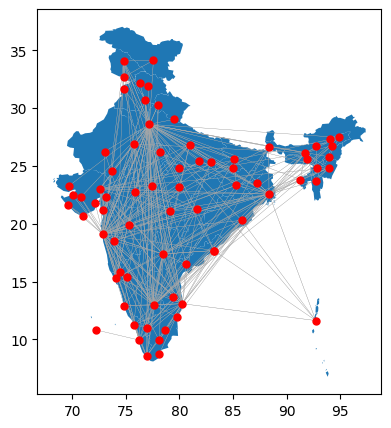

In [59]:
# Plotting the nodes only
fig, ax = plt.subplots(figsize=(5, 5))

min_thickness, max_thickness = 0.2, 5
min_weight, max_weight = 0, max_passengers

india.plot(ax=ax)
for G in [may2015_network]:
    for node in G.nodes():
        ax.plot(places_coordinates[node][1], places_coordinates[node][0], 'ro', markersize=5)
        
for u, v, passengersToCity2 in G.edges(data=True):
    start = places_coordinates[u]
    end = places_coordinates[v]
    weight = passengersToCity2['PASSENGERS TO CITY 2']
    thickness = min_thickness + ((weight - min_weight)/(max_weight-min_weight))*max_thickness
    ax.arrow(start[1],  start[0], end[1]-start[1], end[0]-start[0], alpha=0.8, linewidth= thickness, length_includes_head=True, fc='black', ec='darkgray')

In [20]:
# networks_list = [jan2016_network, feb2016_network, mar2016_network, apr2016_network, may2016_network, jun2016_network, jul2016_network, aug2016_network, sep2016_network, oct2016_network, nov2016_network, dec2016_network, year2016_network, jan2017_network, feb2017_network, mar2017_network, apr2017_network, may2017_network, jun2017_network, jul2017_network, aug2017_network, sep2017_network, oct2017_network, nov2017_network, dec2017_network, year2017_network, jan2018_network, feb2018_network, mar2018_network, apr2018_network, may2018_network, jun2018_network, jul2018_network, aug2018_network, sep2018_network, oct2018_network, nov2018_network, dec2018_network, year2018_network, jan2019_network, feb2019_network, mar2019_network, apr2019_network, may2019_network, jun2019_network, jul2019_network, aug2019_network, sep2019_network, oct2019_network, nov2019_network, dec2019_network, year2019_network, jan2020_network, feb2020_network, mar2020_network, apr2020_network, may2020_network, jun2020_network, jul2020_network, aug2020_network, sep2020_network, oct2020_network, nov2020_network, dec2020_network, year2020_network, jan2021_network, feb2021_network, mar2021_network, apr2021_network, may2021_network, jun2021_network, jul2021_network, aug2021_network, sep2021_network, oct2021_network, nov2021_network, dec2021_network, year2021_network, jan2022_network, feb2022_network, mar2022_network, apr2022_network, may2022_network, jun2022_network, jul2022_network, aug2022_network, sep2022_network, oct2022_network, nov2022_network, dec2022_network, year2022_network, jan2023_network, feb2023_network, mar2023_network, apr2023_network, may2023_network, jun2023_network, jul2023_network, aug2023_network, sep2023_network, oct2023_network, nov2023_network, dec2023_network, year2023_network]

In [26]:
min_thickness, max_thickness = 0.2, 5
min_weight, max_weight = 0, max_passengers

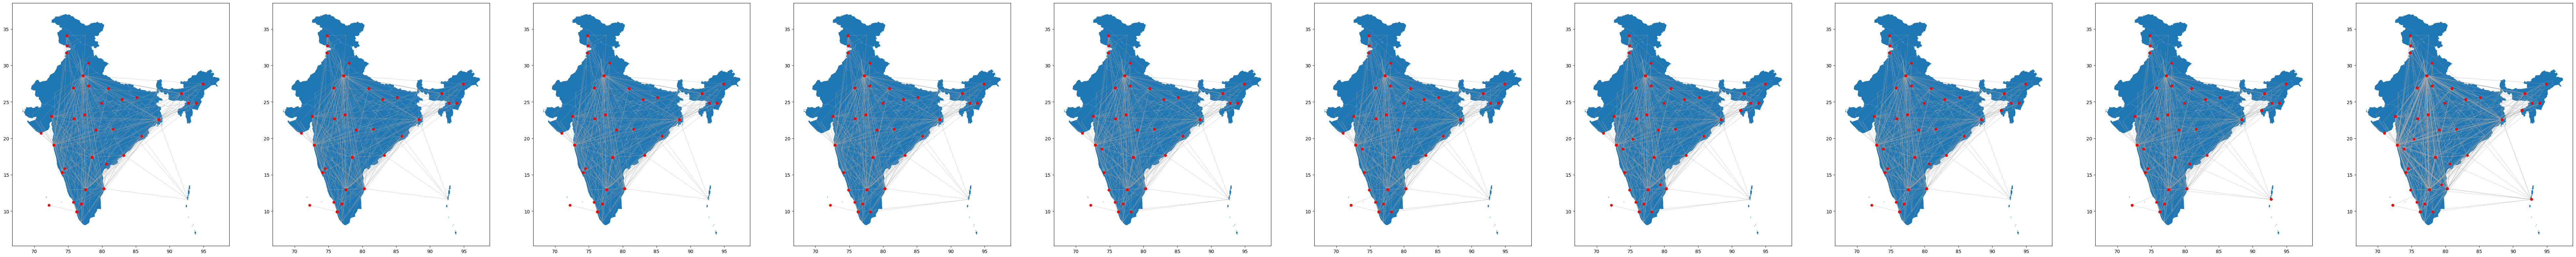

In [36]:
fig, ax = plt.subplots(1, 10, figsize=(20, 5))
# Year 2015
for i, G in enumerate([apr2015_network, may2015_network, jun2015_network, jul2015_network, aug2015_network, sep2015_network, oct2015_network, nov2015_network, dec2015_network, year2015_network]):
    india.plot(ax=ax[i])
    for u, v, passengersToCity2 in G.edges(data=True):
        ax[i].plot(places_coordinates[u][1], places_coordinates[u][0], 'ro', markersize=5)
        start = places_coordinates[u]
        end = places_coordinates[v]
        weight = passengersToCity2['PASSENGERS TO CITY 2']
        thickness = min_thickness + ((weight - min_weight)/(max_weight-min_weight))*max_thickness
        ax[i].arrow(start[1],  start[0], end[1]-start[1], end[0]-start[0], alpha=0.8, linewidth= thickness, length_includes_head=True, fc='black', ec='darkgray')

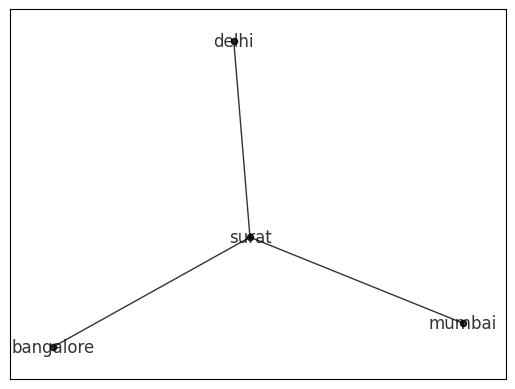

In [43]:
dummy_df = pd.DataFrame({'CITY 1': ['surat', 'surat', 'delhi'], 'CITY 2': ['bangalore', 'mumbai', 'surat'], 'PASSENGERS TO CITY 2': [100, 200, 300], 'PASSENGERS FROM CITY 2': [100, 200, 300], "LAT1": [1, 2, 3], "LONG1": [1, 2, 3], "LAT2": [1, 2, 3], "LONG2": [1, 2, 3]})

G = nx.from_pandas_edgelist(dummy_df, 'CITY 1', 'CITY 2', 'PASSENGERS TO CITY 2')
nx.draw_networkx(G, pos=nx.spring_layout(G), node_size=20, node_color='black', alpha=0.8, with_labels=True)

